<a href="https://colab.research.google.com/github/Darshanbreddy/ML_FREE_CODE_CAMP/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression is used for yes/no (0/1) problems.

Linear Regression is for numbers—it can output <0 or >1 and gets dragged by outliers, so it’s a bad fit for classification.

Underfitting/Overfitting is about model complexity—too simple misses patterns, too complex memorizes noise.

The decision boundary is the line where the model is 50% sure of either class.

The confusion matrix shows correct vs wrong predictions in four boxes (TP, FP, TN, FN).

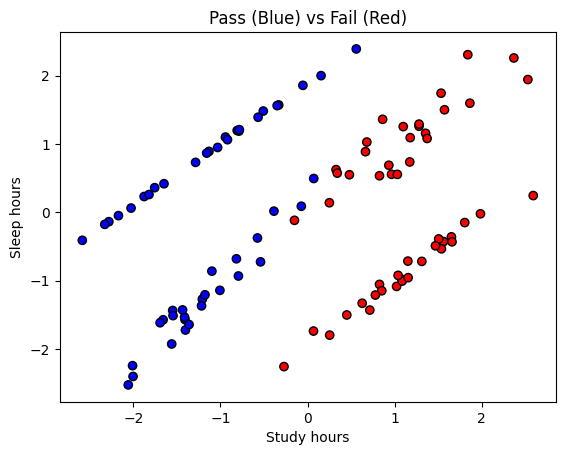

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create synthetic binary classification data
# Think: Each point = one student, 1 = pass, 0 = fail
X, y = make_classification(
    n_samples=100,     # number of students
    n_features=2,      # study hours, sleep hours
    n_informative=2,   # both features matter
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Plot students
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel("Study hours")
plt.ylabel("Sleep hours")
plt.title("Pass (Blue) vs Fail (Red)")
plt.show()


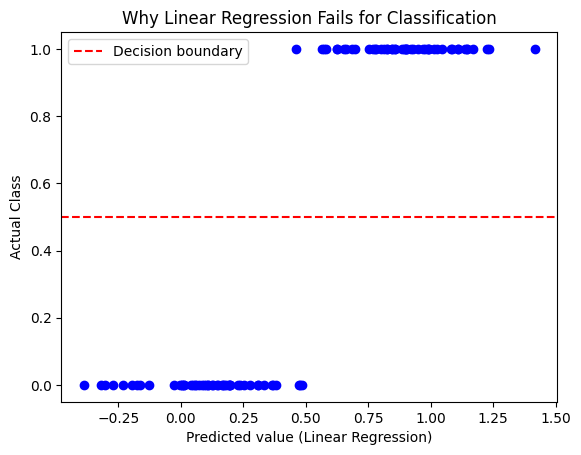

In [7]:
from sklearn.linear_model import LinearRegression

# Fit linear regression (incorrect approach)
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

# Show predictions vs actual
plt.scatter(y_pred_lin, y, color='blue')
plt.axhline(0.5, color='red', linestyle='--', label="Decision boundary")
plt.xlabel("Predicted value (Linear Regression)")
plt.ylabel("Actual Class")
plt.legend()
plt.title("Why Linear Regression Fails for Classification")
plt.show()


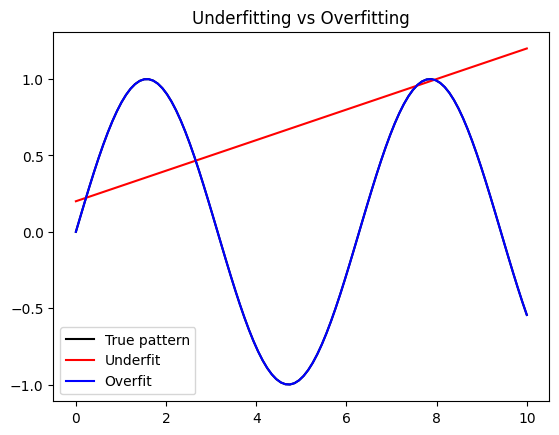

In [8]:
x = np.linspace(0, 10, 100)
y_true = np.sin(x)  # real pattern

# Underfit: straight line
y_under = 0.1 * x + 0.2

# Overfit: crazy curve that memorizes
y_over = np.poly1d(np.polyfit(x, y_true, 15))(x)

plt.plot(x, y_true, label="True pattern", color='black')
plt.plot(x, y_under, label="Underfit", color='red')
plt.plot(x, y_over, label="Overfit", color='blue')
plt.legend()
plt.title("Underfitting vs Overfitting")
plt.show()


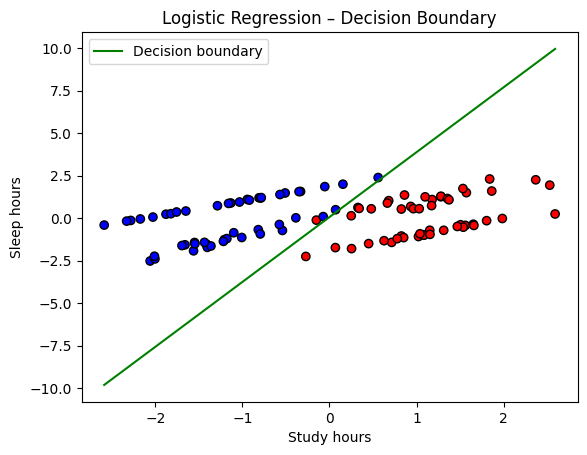

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extract line (decision boundary) that separates pass/fail
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_vals = -(coef[0] * x_vals + intercept) / coef[1]

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.plot(x_vals, y_vals, color='green', label="Decision boundary")
plt.xlabel("Study hours")
plt.ylabel("Sleep hours")
plt.legend()
plt.title("Logistic Regression – Decision Boundary")
plt.show()


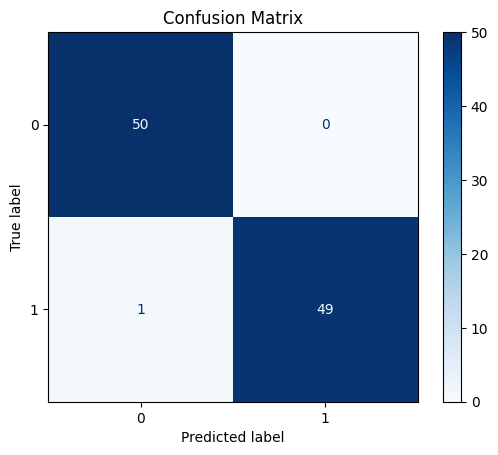

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = log_reg.predict(X)  # predict pass/fail
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
